In [4]:
install.packages('lars', repos='https://cran.r-project.org/')

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'lars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmpkfn4nW\downloaded_packages


In [6]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [5]:
library(lars)

Reference: http://www.stat.cmu.edu/~arinaldo/papers/arLasso.pdf

Lars documentation: https://cran.r-project.org/web/packages/lars/lars.pdf

In [9]:
junets = june()
septts = sept()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [149]:
# difference by week, log
stationary <- function(ts){
    return (diff(log(ts),  168))
    }

In [150]:
st_j = stationary(junets)
st_s = stationary(septts)

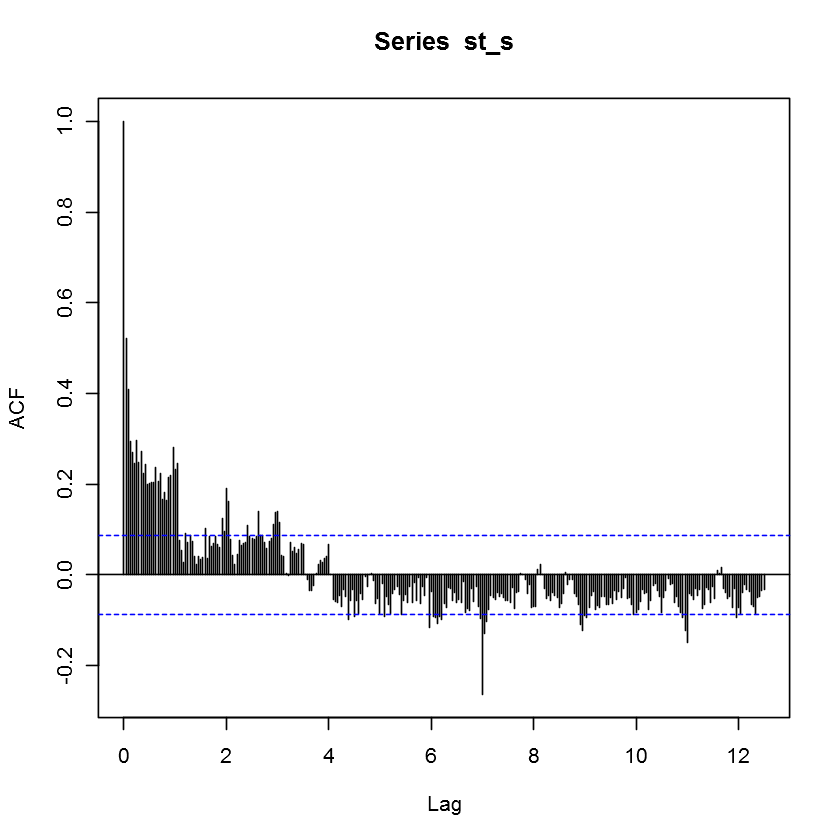

In [160]:
plot(acf(st_s, lag.max=300))

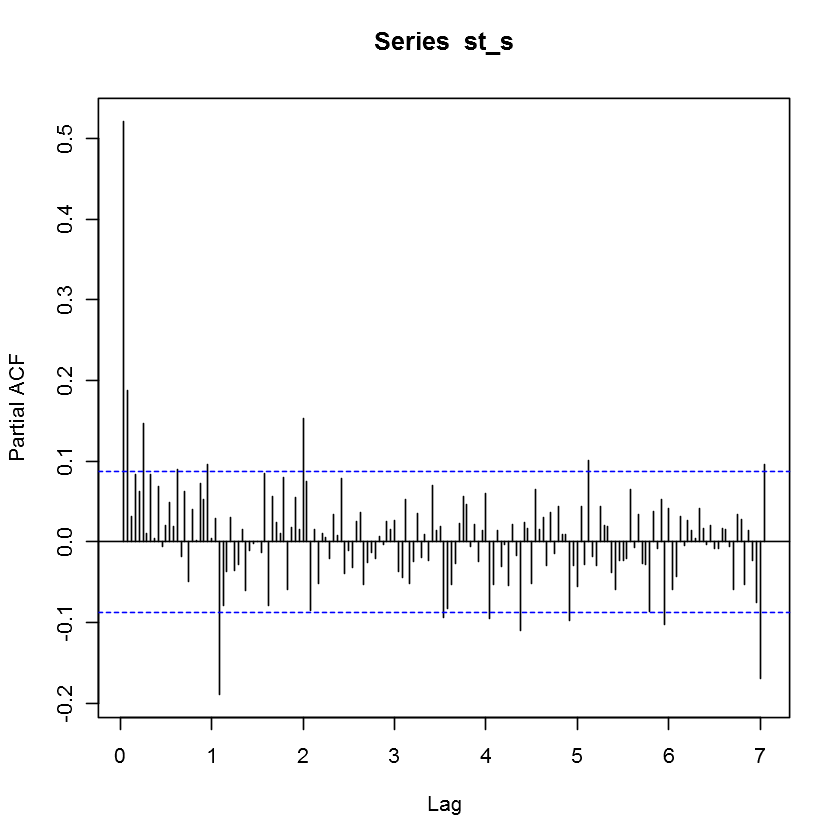

In [154]:
plot(pacf(st_s, lag.max=169))

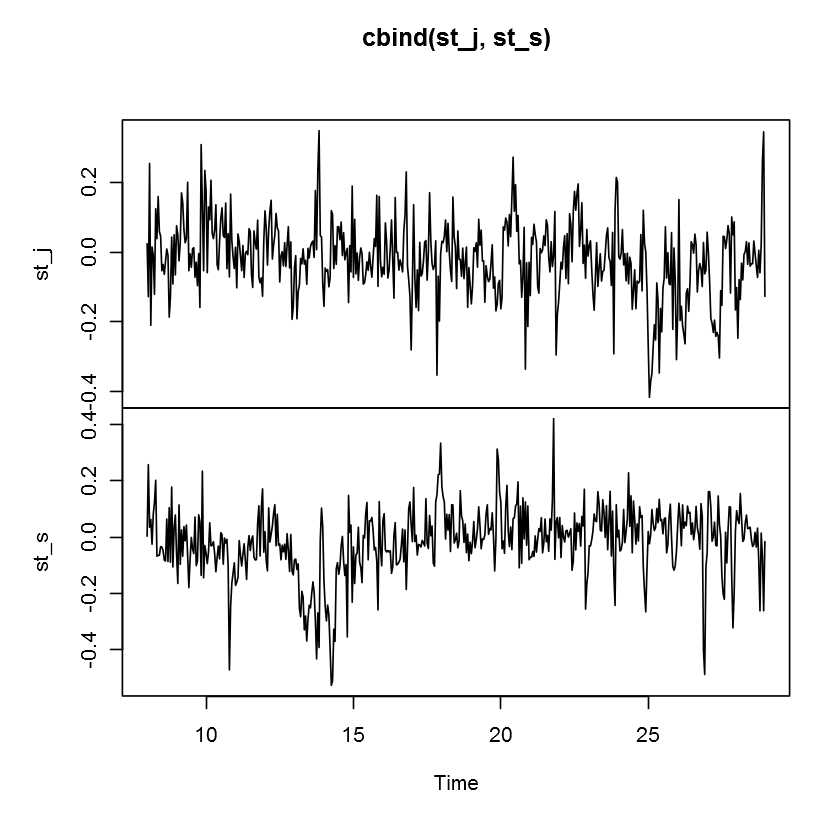

In [151]:
plot.ts(cbind(st_j, st_s))

In [122]:
p=200

In [121]:
ar_matrix <- function(ts, lags){
    m = matrix(ncol=lags, nrow=(length(ts)-lags))
    for (i in 1:nrow(m)){
        m[i, ] = ts[i:(i+lags-1)]
    }
    return (m)
}

In [156]:
ar_j = ar_matrix(st_j, p)

In [157]:
lreg = lars(ar_j, st_j[(p+1):length(st_j)], normalize=FALSE)

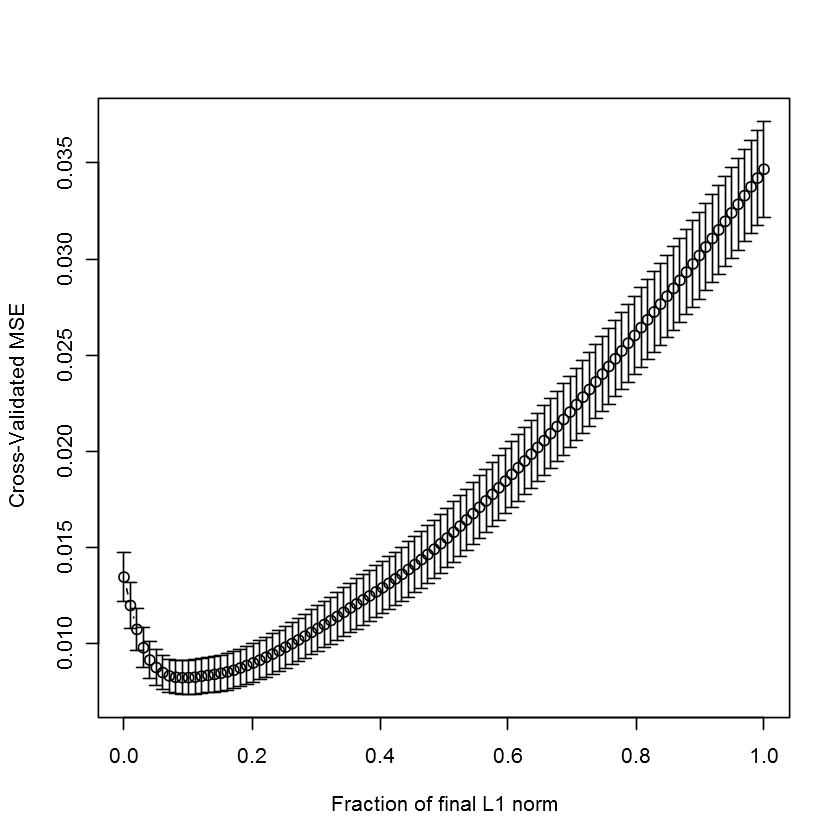

In [161]:
cv.lars(ar_j, st_j[(p+1):length(st_j)])

In [159]:
predict(lreg, type='coef')

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.118525669584642
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00939773832098945,0.127296244391909
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0936704465345674,0.208877930440456
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.127661196543833,0.241082969718625
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.130276788321423,0.243129778889167
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.131219325777389,0.244342058256165
0,0,0,0,0,0.0251074326574266,0,0,0,0,...,0,0,0,0,0,0,0,0,0.138404377583676,0.252255239313869
0,0,0,0,0,0.0392465617420989,0,0,0,0,...,0,0,0,0,0,0,0,0,0.142574505719271,0.256763874219735
0,0,0,0,0,0.0427518189634337,0,0,0,0,...,0,0,0,0,0,0,0,0.00184522775128339,0.142999369645644,0.257497462497662
0,0,0,0,0,0.0491286876976446,0,0,0,0,...,0,0,0,0,0,0,0,0.00619417717566527,0.143722019966792,0.258594575089954
